In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [29]:
# Read CSV files

train_raw = pd.read_csv('train_raw.csv',index_col=0)
test_raw = pd.read_csv('test_raw.csv',index_col=0)
train_loc = pd.read_csv('train_lat_lon.csv',index_col=0)
test_loc = pd.read_csv('test_lat_lon.csv',index_col=0)

area = pd.read_csv('area.csv')

In [30]:
fx = pd.read_excel('BAD_ADDRESS_FIX.xlsx').drop_duplicates('id').set_index('id')
train_raw.update(fx)
test_raw.update(fx)
print('Fix in train: ', train_raw.index.intersection(fx.index).shape[0])
print('Fix in test : ', test_raw.index.intersection(fx.index).shape[0])

('Fix in train: ', 550L)
('Fix in test : ', 149L)


In [31]:
# Merge location data and df
#train_raw_loc = train_raw.join(train_loc)
#test_raw_loc = test_raw.join(test_loc)
train_raw_loc = train_raw
test_raw_loc = test_raw

In [32]:
# Add Administrative district
train = train_raw_loc.merge(area,how='left',on='sub_area')
test = test_raw_loc.merge(area,how='left',on='sub_area')

train.index = train_raw_loc.index
test.index = test_raw_loc.index

In [33]:
# Build Year
train.loc[30153,'build_year']=2015
train.loc[30278,'build_year']=np.NaN
train.loc[13995,'build_year']=2014
train.loc[26335,'build_year']=1961
train.loc[14161,'build_year']=1960
train.loc[10092,'build_year']=2009
train.loc[15223,'build_year']=1965

train.loc[train['build_year'].isin([0,1,3]),'build_year'] = np.NaN

test.loc[33469,'build_year']=2015
test.loc[test['build_year'].isin([0,1,2]),'build_year'] = np.NaN

1860.0 2018.0
1875.0 2019.0


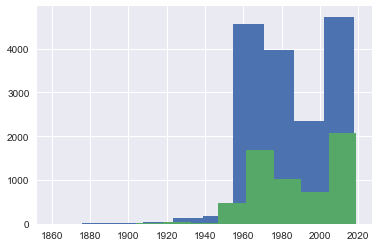

In [34]:
train['build_year'].hist()
test['build_year'].hist()
print np.min(train['build_year']),np.max(train['build_year'])
print np.min(test['build_year']),np.max(test['build_year'])

In [35]:
# Max_floor
train.loc[20725,'max_floor']=9
train.loc[21737,'max_floor']=17 #Average of location (all between 14 and 25)
train.loc[21855,'max_floor']=25 #All at this location have 25
train.loc[25943,'max_floor']= np.NaN

train.loc[train['max_floor']==0,'max_floor'] = np.NaN
train.loc[train['max_floor']<train['floor'],'max_floor'] = np.NaN

test.loc[test['max_floor']==0,'max_floor'] = np.NaN
test.loc[test['max_floor']<test['floor'],'max_floor'] = np.NaN

1.0 57.0
1.0 48.0


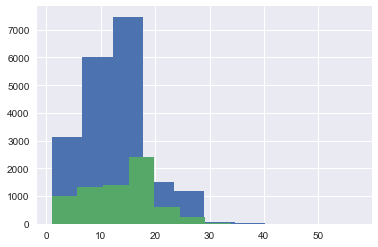

In [36]:
train['max_floor'].hist()
test['max_floor'].hist()
print np.min(train['max_floor']),np.max(train['max_floor'])
print np.min(test['max_floor']),np.max(test['max_floor'])

1.0 44.0
1 41


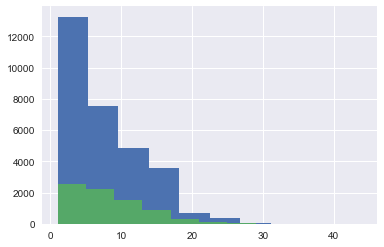

In [37]:
# Floor
train.loc[train['floor']==0,'floor'] = np.NaN
train.loc[23587,'floor'] = np.NaN

train['floor'].hist()
test['floor'].hist()
print np.min(train['floor']),np.max(train['floor'])
print np.min(test['floor']),np.max(test['floor'])

In [38]:
# Full and life sq (Run only once!)

train.loc[[1030,27796,3599,22788,129,18344,23718,1310],['full_sq','life_sq']] = train.loc[[1030,27796,3599,22788,129,18344,23718,1310],['full_sq','life_sq']] /10.0

train.loc[[2012,1189,11335,22415,24299,26267,26366,1825],'full_sq'] = train.loc[[2012,1189,11335,22415,24299,26267,26366,1825],'life_sq']
train.loc[6115,'full_sq'] = np.NaN

train.loc[((train['full_sq']==1) & (train['life_sq']==1) & (train['floor']==1)) | ((train['full_sq']==0) & (train['life_sq']==0) & (train['floor']==0)),['full_sq','life_sq','floor','max_floor','num_room','kitch_sq','state']] = np.NaN
train.loc[((train['full_sq']==0) | (train['full_sq']==1)) & train['life_sq']>5, 'full_sq'] = train.loc[((train['full_sq']==0) | (train['full_sq']==1)) & train['life_sq']>5, 'life_sq']

train.loc[(train['life_sq']>1) & (train['full_sq']>100*train['life_sq']),'full_sq'] = train.loc[(train['life_sq']>1) & (train['full_sq']>100*train['life_sq']),'full_sq']/100.0
train.loc[(train['life_sq']>1) & (train['full_sq']>10*train['life_sq']),'full_sq'] = train.loc[(train['life_sq']>1) & (train['full_sq']>10*train['life_sq']),'full_sq']/10.0

train.loc[(train['life_sq']>1) & (train['full_sq']/train['life_sq']<0.05),'life_sq'] = train.loc[(train['life_sq']>1) & (train['full_sq']/train['life_sq']<0.5),'life_sq']/100.0
train.loc[(train['life_sq']>1) & (train['full_sq']/train['life_sq']<0.5),'life_sq'] = train.loc[(train['life_sq']>1) & (train['full_sq']/train['life_sq']<0.5),'life_sq']/10.0

train.loc[(train['full_sq']==0) | (train['full_sq']==1),'full_sq'] = np.NaN
train.loc[(train['life_sq']==0) | (train['life_sq']==1),'life_sq'] = np.NaN



test.loc[[30938,35857],'full_sq'] = test.loc[[30938,35857],'life_sq']
test.loc[36824, ['full_sq','life_sq']] = np.NaN
test.loc[[32501,33278],'life_sq'] = np.NaN

test.loc[(test['life_sq']>1) & (test['full_sq']/test['life_sq']<0.5),'life_sq'] = test.loc[(test['life_sq']>1) & (test['full_sq']/test['life_sq']<0.5),'life_sq']/10.0

test.loc[(test['life_sq']==0 ) | (test['life_sq']==1 ),'life_sq'] = np.NaN


10.0 303.0
10.0 403.0


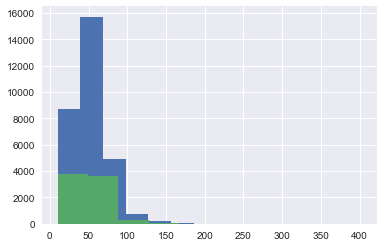

In [39]:
train['full_sq'].hist()
test['full_sq'].hist()
print np.min(train['full_sq']),np.max(train['full_sq'])
print np.min(test['full_sq']),np.max(test['full_sq'])

7.0 232.0
8.1 232.7


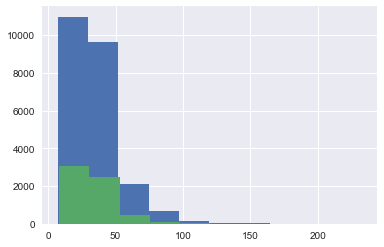

In [40]:
train['life_sq'].hist()
test['life_sq'].hist()
print np.min(train['life_sq']),np.max(train['life_sq'])
print np.min(test['life_sq']),np.max(test['life_sq'])

In [41]:
# Kitchen (Only run once!)

train.loc[[10371,21418,13120,28737],'build_year'] = train.loc[[10371,21418,13120,28737],'kitch_sq'].copy()
train.loc[[10371,21418,13120,28737],'kitch_sq'] = np.NaN

train.loc[(train['kitch_sq']==0) | (train['kitch_sq']==1),'kitch_sq'] = np.NaN
train.loc[(train['kitch_sq'] >= train['full_sq']) | (train['kitch_sq']>= train['life_sq']),'kitch_sq'] = np.NaN

test.loc[[31381,36811],'kitch_sq'] = np.NaN
test.loc[test['kitch_sq']==test['full_sq'],'kitch_sq'] = np.NaN
test.loc[[37733,37503],'kitch_sq'] = np.NaN

test.loc[[32505,34333,36970],'kitch_sq'] = test.loc[[32505,34333,36970],'kitch_sq']/10.0
test.loc[[31014,32266],['kitch_sq','life_sq']] = test.loc[[31014,32266],['life_sq','kitch_sq']]
test.loc[(test['kitch_sq'] >= test['full_sq']) | (test['kitch_sq']>= test['life_sq']),'kitch_sq'] = np.NaN
test.loc[(test['kitch_sq']==0) | (test['kitch_sq']==1),'kitch_sq'] = np.NaN

2.0 57.0
1.1 52.9


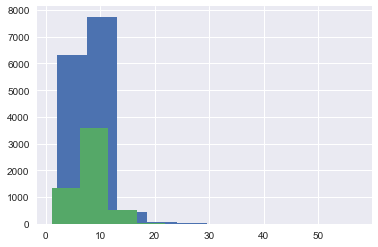

In [42]:
train['kitch_sq'].hist()
test['kitch_sq'].hist()
print np.min(train['kitch_sq']),np.max(train['kitch_sq'])
print np.min(test['kitch_sq']),np.max(test['kitch_sq'])

In [43]:
# Room
train.loc[train['num_room']==0, 'num_room'] = np.NaN
train.loc[train['num_room'] >= 10, 'num_room'] = np.NaN
train.loc[[19393,25350,26002,17431,25284,12201,14592,11020,25654],'num_room'] = np.NaN

test.loc[31301, 'num_room'] = 3 #kitch_sq
test.loc[[33648,37787,31903],'num_room'] = np.NaN

1.0 9.0
1.0 7.0


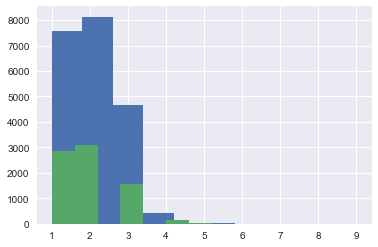

In [44]:
train['num_room'].hist()
test['num_room'].hist()
print np.min(train['num_room']),np.max(train['num_room'])
print np.min(test['num_room']),np.max(test['num_room'])

In [45]:
# State
train.loc[10092,'state'] = 3

1.0 4.0
1.0 4.0


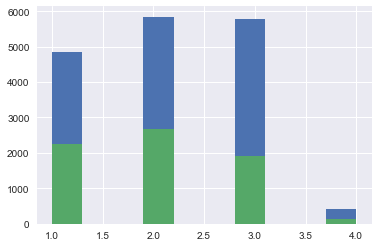

In [46]:
train['state'].hist()
test['state'].hist()
print np.min(train['state']),np.max(train['state'])
print np.min(test['state']),np.max(test['state'])

In [47]:
train['area'] = train['area'].astype('category')
train['area'].value_counts()

Novomoskovski      6463
Jugoistočni        4065
Južni              3246
Istočni            2916
Jugozapadni        2448
Sjeverni           2380
Sjeveroistočni     2229
Zapadni            2218
Sjeverozapadni     2081
Centrali            950
Zelenogradski       934
Troicki             541
Name: area, dtype: int64

In [48]:
# Convert Yes/No to 1/0

fields = ['culture_objects_top_25','thermal_power_plant_raion','incineration_raion','oil_chemistry_raion','radiation_raion','railroad_terminal_raion','big_market_raion','nuclear_reactor_raion','detention_facility_raion','railroad_1line','big_road1_1line','water_1line']

for field in fields:
    train[field] = (train[field]=='yes').astype(int)
    test[field] = (test[field]=='yes').astype(int)

In [49]:
# One-Hot encoding 
fields = ['product_type','material','ecology','area']

for field in fields:
    df_temp = pd.get_dummies(train[field],prefix = field, drop_first=True)
    train = pd.concat([train,df_temp],axis=1)
    train.drop(field, axis=1, inplace=True)
    
    df_temp = pd.get_dummies(test[field],prefix = field, drop_first=True)
    test = pd.concat([test,df_temp],axis=1)
    test.drop(field, axis=1, inplace=True)

In [50]:
# LabelEncoding
fields = ['sub_area']
for field in fields:
    train[field] = train[field].astype('category').cat.codes
    
    test[field] = test[field].astype('category').cat.codes

In [52]:
train.to_csv('cleaned_train.csv',na_rep = "NA")
test.to_csv('cleaned_test.csv',na_rep = "NA")